In [46]:
# import autoreload
# ?autoreload

%load_ext autoreload
%autoreload 2
import torch
from transformers import BertModel
from transformers import AutoConfig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
# config = AutoConfig.from_pretrained("prajjwal1/bert-tiny")
config = AutoConfig.from_pretrained("bert-base-uncased")
config.hidden_act = 'gelu_fast'
config.torchscript = True
model = BertModel(config)
inputs = torch.randint(1000, size=(1, 100)).long()
# model()
# with torch.onnx.select_model_mode_for_export(model, False):
  # trace, _ = torch.jit._get_trace_graph(model, args=(inputs,))
#     trace = torch.jit.trace(model, (inputs, ))
mo=model.eval()

In [77]:
import pdir

In [79]:
pdir(mo)

property:
    T_destination, _backward_hooks, _buffers, _forward_hooks, _forward_pre_hooks, _load_state_dict_pre_hooks, _modules, _non_persistent_buffers_set, _parameters, _state_dict_hooks, _version, authorized_missing_keys, authorized_unexpected_keys, base_model_prefix, config, dump_patches, embeddings, encoder, keys_to_never_save, name_or_path, pooler, training
special attribute:
    __annotations__, __class__, __dict__, __doc__, __module__, __weakref__
abstract class:
    __subclasshook__
object customization:
    __format__, __hash__, __init__, __new__, __repr__, __sizeof__, __str__
rich comparison:
    __eq__, __ge__, __gt__, __le__, __lt__, __ne__
attribute access:
    __delattr__, __dir__, __getattr__, __getattribute__, __setattr__
class customization:
    __init_subclass__
pickle:
    __reduce__, __reduce_ex__, __setstate__
descriptor:
    base_model: @property with getter, :obj:`torch.nn.Module`: The main body of the model.
    device: @property with getter, :obj:`torch.devic

In [72]:
mo

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [73]:
import time

def log_start_builder(name):
    def log_start(module, m_in):
        print(name, module.__class__.__name__, 'start', time.time())
    return log_start
def log_end_builder(name):
    def log_end(module, m_in, m_out):
        print(name, module.__class__.__name__, 'end', time.time())
    return log_end

In [74]:
for name, module in mo.named_modules():
    print(name, module.__class__.__name__)
    module.register_forward_pre_hook(log_start_builder(name))
    module.register_forward_hook(log_end_builder(name))

 BertModel
embeddings BertEmbeddings
embeddings.word_embeddings Embedding
embeddings.position_embeddings Embedding
embeddings.token_type_embeddings Embedding
embeddings.LayerNorm LayerNorm
embeddings.dropout Dropout
encoder BertEncoder
encoder.layer ModuleList
encoder.layer.0 BertLayer
encoder.layer.0.attention BertAttention
encoder.layer.0.attention.self BertSelfAttention
encoder.layer.0.attention.self.query Linear
encoder.layer.0.attention.self.key Linear
encoder.layer.0.attention.self.value Linear
encoder.layer.0.attention.self.dropout Dropout
encoder.layer.0.attention.output BertSelfOutput
encoder.layer.0.attention.output.dense Linear
encoder.layer.0.attention.output.LayerNorm LayerNorm
encoder.layer.0.attention.output.dropout Dropout
encoder.layer.0.intermediate BertIntermediate
encoder.layer.0.intermediate.dense Linear
encoder.layer.0.output BertOutput
encoder.layer.0.output.dense Linear
encoder.layer.0.output.LayerNorm LayerNorm
encoder.layer.0.output.dropout Dropout
encoder.lay

In [75]:
trace = torch.jit.trace(model, inputs) # 1605233162.4006221

 BertModel start 1605233159.3215292
embeddings BertEmbeddings start 1605233159.3250391
embeddings.word_embeddings Embedding start 1605233159.3258
embeddings.word_embeddings Embedding end 1605233159.3267999
embeddings.position_embeddings Embedding start 1605233159.3270159
embeddings.position_embeddings Embedding end 1605233159.327935
embeddings.token_type_embeddings Embedding start 1605233159.328186
embeddings.token_type_embeddings Embedding end 1605233159.329014
embeddings.LayerNorm LayerNorm start 1605233159.330348
embeddings.LayerNorm LayerNorm end 1605233159.331576
embeddings.dropout Dropout start 1605233159.331844
embeddings.dropout Dropout end 1605233159.33263
embeddings BertEmbeddings end 1605233159.332793
encoder BertEncoder start 1605233159.333067
encoder.layer.0 BertLayer start 1605233159.333193
encoder.layer.0.attention BertAttention start 1605233159.3333042
encoder.layer.0.attention.self BertSelfAttention start 1605233159.3334122
encoder.layer.0.attention.self.query Linear s

encoder.layer.6.attention.self.dropout Dropout start 1605233159.735748
encoder.layer.6.attention.self.dropout Dropout end 1605233159.736635
encoder.layer.6.attention.self BertSelfAttention end 1605233159.739626
encoder.layer.6.attention.output BertSelfOutput start 1605233159.7397661
encoder.layer.6.attention.output.dense Linear start 1605233159.73996
encoder.layer.6.attention.output.dense Linear end 1605233159.743243
encoder.layer.6.attention.output.dropout Dropout start 1605233159.7435882
encoder.layer.6.attention.output.dropout Dropout end 1605233159.744777
encoder.layer.6.attention.output.LayerNorm LayerNorm start 1605233159.745652
encoder.layer.6.attention.output.LayerNorm LayerNorm end 1605233159.746937
encoder.layer.6.attention.output BertSelfOutput end 1605233159.747252
encoder.layer.6.attention BertAttention end 1605233159.747392
encoder.layer.6.intermediate BertIntermediate start 1605233159.7498848
encoder.layer.6.intermediate.dense Linear start 1605233159.750458
encoder.layer

 BertModel start 1605233160.5094929
embeddings BertEmbeddings start 1605233160.5146182
embeddings.word_embeddings Embedding start 1605233160.515347
embeddings.word_embeddings Embedding end 1605233160.516169
embeddings.position_embeddings Embedding start 1605233160.516381
embeddings.position_embeddings Embedding end 1605233160.5171509
embeddings.token_type_embeddings Embedding start 1605233160.517248
embeddings.token_type_embeddings Embedding end 1605233160.518071
embeddings.LayerNorm LayerNorm start 1605233160.519047
embeddings.LayerNorm LayerNorm end 1605233160.519851
embeddings.dropout Dropout start 1605233160.520065
embeddings.dropout Dropout end 1605233160.52066
embeddings BertEmbeddings end 1605233160.5207648
encoder BertEncoder start 1605233160.52086
encoder.layer.0 BertLayer start 1605233160.5209758
encoder.layer.0.attention BertAttention start 1605233160.521217
encoder.layer.0.attention.self BertSelfAttention start 1605233160.521323
encoder.layer.0.attention.self.query Linear s

encoder.layer.3.attention.output.dense Linear end 1605233160.7135968
encoder.layer.3.attention.output.dropout Dropout start 1605233160.713998
encoder.layer.3.attention.output.dropout Dropout end 1605233160.71544
encoder.layer.3.attention.output.LayerNorm LayerNorm start 1605233160.71666
encoder.layer.3.attention.output.LayerNorm LayerNorm end 1605233160.718981
encoder.layer.3.attention.output BertSelfOutput end 1605233160.7194188
encoder.layer.3.attention BertAttention end 1605233160.719572
encoder.layer.3.intermediate BertIntermediate start 1605233160.722333
encoder.layer.3.intermediate.dense Linear start 1605233160.722692
encoder.layer.3.intermediate.dense Linear end 1605233160.729732
encoder.layer.3.intermediate BertIntermediate end 1605233160.736257
encoder.layer.3.output BertOutput start 1605233160.736528
encoder.layer.3.output.dense Linear start 1605233160.736655
encoder.layer.3.output.dense Linear end 1605233160.742783
encoder.layer.3.output.dropout Dropout start 1605233160.7430

encoder.layer.10.attention.self.dropout Dropout start 1605233161.1193442
encoder.layer.10.attention.self.dropout Dropout end 1605233161.121492
encoder.layer.10.attention.self BertSelfAttention end 1605233161.1254988
encoder.layer.10.attention.output BertSelfOutput start 1605233161.12571
encoder.layer.10.attention.output.dense Linear start 1605233161.1258721
encoder.layer.10.attention.output.dense Linear end 1605233161.129436
encoder.layer.10.attention.output.dropout Dropout start 1605233161.1298308
encoder.layer.10.attention.output.dropout Dropout end 1605233161.130971
encoder.layer.10.attention.output.LayerNorm LayerNorm start 1605233161.1318002
encoder.layer.10.attention.output.LayerNorm LayerNorm end 1605233161.1331258
encoder.layer.10.attention.output BertSelfOutput end 1605233161.133429
encoder.layer.10.attention BertAttention end 1605233161.133591
encoder.layer.10.intermediate BertIntermediate start 1605233161.135606
encoder.layer.10.intermediate.dense Linear start 1605233161.135

encoder.layer.6.attention.self BertSelfAttention end 1605233162.191394
encoder.layer.6.attention.output BertSelfOutput start 1605233162.191551
encoder.layer.6.attention.output.dense Linear start 1605233162.191653
encoder.layer.6.attention.output.dense Linear end 1605233162.193556
encoder.layer.6.attention.output.dropout Dropout start 1605233162.1939359
encoder.layer.6.attention.output.dropout Dropout end 1605233162.1940532
encoder.layer.6.attention.output.LayerNorm LayerNorm start 1605233162.194396
encoder.layer.6.attention.output.LayerNorm LayerNorm end 1605233162.194803
encoder.layer.6.attention.output BertSelfOutput end 1605233162.195133
encoder.layer.6.attention BertAttention end 1605233162.19524
encoder.layer.6.intermediate BertIntermediate start 1605233162.195433
encoder.layer.6.intermediate.dense Linear start 1605233162.195544
encoder.layer.6.intermediate.dense Linear end 1605233162.201525
encoder.layer.6.intermediate BertIntermediate end 1605233162.2062552
encoder.layer.6.outpu

encoder.layer.11.output.dense Linear end 1605233162.39436
encoder.layer.11.output.dropout Dropout start 1605233162.394857
encoder.layer.11.output.dropout Dropout end 1605233162.3949811
encoder.layer.11.output.LayerNorm LayerNorm start 1605233162.395479
encoder.layer.11.output.LayerNorm LayerNorm end 1605233162.396487
encoder.layer.11.output BertOutput end 1605233162.3974621
encoder.layer.11 BertLayer end 1605233162.397602
encoder BertEncoder end 1605233162.397761
pooler BertPooler start 1605233162.3979242
pooler.dense Linear start 1605233162.3981068
pooler.dense Linear end 1605233162.399553
pooler.activation Tanh start 1605233162.4000041
pooler.activation Tanh end 1605233162.400415
pooler BertPooler end 1605233162.4005141
 BertModel end 1605233162.4006221


In [5]:
config=model.config
config.hidden_act = 'gelu_fast'
config

BertConfig {
  "_name_or_path": "prajjwal1/bert-tiny",
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu_fast",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 128,
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 2,
  "num_hidden_layers": 2,
  "pad_token_id": 0,
  "torchscript": true,
  "type_vocab_size": 2,
  "vocab_size": 30522
}

In [6]:
from torch import nn
from transformers.activations import ACT2FN

class BertIntermediate(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.intermediate_size)
        if isinstance(config.hidden_act, str):
            self.intermediate_act_fn = ACT2FN[config.hidden_act]
        else:
            self.intermediate_act_fn = config.hidden_act

    def forward(self, hidden_states):
        hidden_states = self.dense(hidden_states)
#         hidden_states = self.intermediate_act_fn(hidden_states)
        return hidden_states

In [7]:
fc_model = BertIntermediate(config)
input_len = 32
input_states = torch.rand((input_len, config.hidden_size))
fc_model.eval()

BertIntermediate(
  (dense): Linear(in_features=128, out_features=512, bias=True)
)

In [8]:
fc_trace = torch.jit.trace(fc_model, input_states)
fc_graph = fc_trace.inlined_graph

In [9]:
fc_graph

graph(%self.1 : __torch__.BertIntermediate,
      %input : Float(32:128, 128:1)):
  %2 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="dense"](%self.1)
  %4 : int = prim::Constant[value=1](), scope: __module.dense # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/torch/nn/functional.py:1674:0
  %5 : Tensor = prim::GetAttr[name="bias"](%2)
  %6 : Tensor = prim::GetAttr[name="weight"](%2)
  %7 : Float(128:1, 512:128) = aten::t(%6), scope: __module.dense # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/torch/nn/functional.py:1674:0
  %8 : Float(32:512, 512:1) = aten::addmm(%5, %input, %7, %4, %4), scope: __module.dense # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/torch/nn/functional.py:1674:0
  return (%8)

In [10]:
list(fc_graph.nodes())

[%2 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="dense"](%self.1),
 %4 : int = prim::Constant[value=1](), scope: __module.dense # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/torch/nn/functional.py:1674:0,
 %5 : Tensor = prim::GetAttr[name="bias"](%2),
 %6 : Tensor = prim::GetAttr[name="weight"](%2),
 %7 : Float(128:1, 512:128) = aten::t(%6), scope: __module.dense # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/torch/nn/functional.py:1674:0,
 %8 : Float(32:512, 512:1) = aten::addmm(%5, %input, %7, %4, %4), scope: __module.dense # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/torch/nn/functional.py:1674:0]

In [11]:
fc_in_nodes=list(fc_graph.inputs())
[i for i in dir(fc_in_nodes[0]) if not i.startswith('__')]

['copyMetadata',
 'debugName',
 'inferTypeFrom',
 'isCompleteTensor',
 'node',
 'offset',
 'replaceAllUsesWith',
 'requiresGrad',
 'requires_grad',
 'setDebugName',
 'setType',
 'setTypeAs',
 'toIValue',
 'type',
 'unique',
 'uses']

In [12]:
fc_in_nodes[1].debugName()

'input'

In [13]:
list(fc_graph.outputs())

[8 defined in (%8 : Float(32:512, 512:1) = aten::addmm(%5, %input, %7, %4, %4), scope: __module.dense # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/torch/nn/functional.py:1674:0
 )]

In [51]:
trace = torch.jit.trace(model, inputs)
graph = trace.inlined_graph

/Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:191: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  position_ids = self.position_ids[:, :seq_length]
/Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_utils.py:1673: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  input_tensor.shape == tensor_shape for input_tensor in input_tensors


In [52]:
graph

graph(%self.1 : __torch__.transformers.modeling_bert.___torch_mangle_124.BertModel,
      %input_ids : Long(1:100, 100:1)):
  %2 : __torch__.transformers.modeling_bert.___torch_mangle_123.BertPooler = prim::GetAttr[name="pooler"](%self.1)
  %3 : __torch__.transformers.modeling_bert.___torch_mangle_120.BertEncoder = prim::GetAttr[name="encoder"](%self.1)
  %4 : __torch__.transformers.modeling_bert.___torch_mangle_84.BertEmbeddings = prim::GetAttr[name="embeddings"](%self.1)
  %5 : int = prim::Constant[value=0]() # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:802:0
  %6 : int = aten::size(%input_ids, %5) # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:802:0
  %7 : Long() = prim::NumToTensor(%6)
  %8 : int = aten::Int(%7)
  %9 : int = aten::Int(%7)
  %10 : int = prim::Constant[value=1]() # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:802:0
  %11

In [16]:
ni=list(graph.nodes())
ni

[%2 : __torch__.transformers.modeling_bert.BertPooler = prim::GetAttr[name="pooler"](%self.1),
 %3 : __torch__.transformers.modeling_bert.BertEncoder = prim::GetAttr[name="encoder"](%self.1),
 %4 : __torch__.transformers.modeling_bert.BertEmbeddings = prim::GetAttr[name="embeddings"](%self.1),
 %5 : int = prim::Constant[value=0]() # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:802:0,
 %6 : int = aten::size(%input_ids, %5) # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:802:0,
 %7 : Long() = prim::NumToTensor(%6),
 %8 : int = aten::Int(%7),
 %9 : int = aten::Int(%7),
 %10 : int = prim::Constant[value=1]() # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:802:0,
 %11 : int = aten::size(%input_ids, %10) # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:802:0,
 %12 : Long() = prim::NumToTensor(%11),
 %13

In [17]:
ni[0].output().node()

%2 : __torch__.transformers.modeling_bert.BertPooler = prim::GetAttr[name="pooler"](%self.1)

In [18]:
ni[0].output()

2 defined in (%2 : __torch__.transformers.modeling_bert.BertPooler = prim::GetAttr[name="pooler"](%self.1)
)

In [19]:
ni[72].output() # build all input leaf data nodes, then construct the opnode with input and output nodes

78 defined in (%78 : Float(1:12800, 100:128, 128:1) = aten::add(%inputs_embeds, %position_embeddings, %63), scope: __module.embeddings # /Users/qqcao/.pyenv/versions/nlpnrg/lib/python3.8/site-packages/transformers/modeling_bert.py:201:0
)

In [20]:
ni[0]

%2 : __torch__.transformers.modeling_bert.BertPooler = prim::GetAttr[name="pooler"](%self.1)

In [21]:
list(ni[0].outputs())

[2 defined in (%2 : __torch__.transformers.modeling_bert.BertPooler = prim::GetAttr[name="pooler"](%self.1)
 )]

In [22]:
list(ni[0].inputs())

[self.1 defined in (%self.1 : __torch__.transformers.modeling_bert.BertModel, %input_ids : Long(1:100, 100:1) = prim::Param()
 )]

In [23]:
pn=ni[0].input().node()
pn

%self.1 : __torch__.transformers.modeling_bert.BertModel, %input_ids : Long(1:100, 100:1) = prim::Param()

In [24]:
gi=list(graph.inputs())
gi

[self.1 defined in (%self.1 : __torch__.transformers.modeling_bert.BertModel, %input_ids : Long(1:100, 100:1) = prim::Param()
 ),
 input_ids defined in (%self.1 : __torch__.transformers.modeling_bert.BertModel, %input_ids : Long(1:100, 100:1) = prim::Param()
 )]

In [25]:
list(gi[0].node().outputs())[0].type()

__torch__.transformers.modeling_bert.BertModel

In [26]:
list(gi[1].node().outputs())[1].type().sizes()

[1, 100]

In [27]:
'encoder/encoder.layer.0/encoder.layer.0.attention/encoder.layer.0.attention.output'.split('/')[-1]

'encoder.layer.0.attention.output'

In [28]:
print(pn)
print(gi[1].node())
pn==gi[0].node()

%self.1 : __torch__.transformers.modeling_bert.BertModel, %input_ids : Long(1:100, 100:1) = prim::Param()

%self.1 : __torch__.transformers.modeling_bert.BertModel, %input_ids : Long(1:100, 100:1) = prim::Param()



True

In [29]:
[i.user for i in gi[0].uses()]

[%2 : __torch__.transformers.modeling_bert.BertPooler = prim::GetAttr[name="pooler"](%self.1),
 %3 : __torch__.transformers.modeling_bert.BertEncoder = prim::GetAttr[name="encoder"](%self.1),
 %4 : __torch__.transformers.modeling_bert.BertEmbeddings = prim::GetAttr[name="embeddings"](%self.1)]

In [30]:
go=list(graph.outputs())
go

[54 defined in (%54 : (Float(1:12800, 100:128, 128:1), Float(1:128, 128:1)) = prim::TupleConstruct(%hidden_states, %289)
 )]

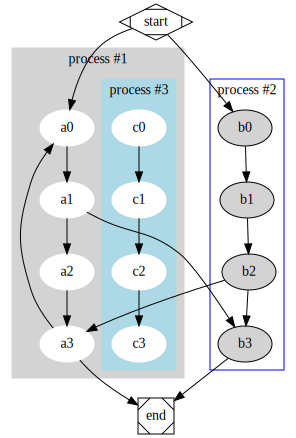

In [37]:
from graphviz import Digraph

g = Digraph('G')

c0 = Digraph('cluster_0')
c0.body.append('style=filled')
c0.body.append('color=lightgrey')
c0.node_attr.update(style='filled', color='white')
c0.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
c0.body.append('label ="process #1"')

c2 = Digraph('cluster_0')
c2.body.append('style=filled')
c2.body.append('color=lightgrey')
c2.node_attr.update(style='filled', color='white')
c2.edges([('c0', 'c1'), ('c1', 'c2'), ('c2', 'c3')])
c2.body.append('label ="process #3"')
c2.body.append('color=lightblue')
c0.subgraph(c2)

c1 = Digraph('cluster_1')
c1.node_attr.update(style='filled')
c1.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
c1.body.append('label ="process #2"')
c1.body.append('color=blue')

g.subgraph(c0)
g.subgraph(c1)

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

g

In [33]:
# sub_scopes='encoder.layer.0.attention.output.LayerNorm'.split('.')

In [34]:
'true' if '' and len(''.split('.')) else 'false'

'false'

In [45]:
sub_scopes='encoder.layer.0.attention.output.LayerNorm'.split('.')
for si in range(len(sub_scopes), 0, -1):
    p_scope = '.'.join(sub_scopes[0:si-1])
    child_scope = '.'.join(sub_scopes[0:si])
    print(si, p_scope, child_scope)

6 encoder.layer.0.attention.output encoder.layer.0.attention.output.LayerNorm
5 encoder.layer.0.attention encoder.layer.0.attention.output
4 encoder.layer.0 encoder.layer.0.attention
3 encoder.layer encoder.layer.0
2 encoder encoder.layer
1  encoder
